# GDP and Life Expectancy



This project aims at analyzing the relationship between country's GDP and the life expectancy of its citizens based on the data provided. Here are a few questions that this project will seek to answer:<br>
<br>
Has life expectancy increased over time in the six nations?<br>
Has GDP increased over time in the six nations?<br>
Is there a correlation between GDP and life expectancy of a country?<br>
What is the average life expectancy in these nations?<br>
What is the distribution of that life expectancy?

## 1. Preparing the data

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_file = pd.read_csv('all_data.csv')
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [3]:
data_file.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [4]:
#Renaming the life expectancy column to make it usable as an attribute
data_file.rename(columns = {'Life expectancy at birth (years)':'Life'}, inplace = True)

#Reformatting the GDP values to show them as billions
data_file.GDP = data_file['GDP'].apply(lambda x: round((x / 1000000000),4))

#Renaming United States of America to USA
data_file = data_file.replace({'United States of America':'USA'})

#Preparing labels for x and y values:
life = 'Life expectancy at birth (years)'
GDP = 'GDP (in billions of USD)'

#Preparing a color scheme for the countries:
colors = {'Chile':'blue', 'China':'orange', 'Germany':'green','Mexico':'red','USA':'purple','Zimbabwe':'brown'}

#Checking the list of countries
print('''###############################################
List of countries in the dataset:''')
print(data_file.Country.unique())

#Checking data sample after modifications
print('''###############################################
DataFrame sample (after modifications):''')
print(data_file.head())




###############################################
List of countries in the dataset:
['Chile' 'China' 'Germany' 'Mexico' 'USA' 'Zimbabwe']
###############################################
DataFrame sample (after modifications):
  Country  Year  Life      GDP
0   Chile  2000  77.3  77.8609
1   Chile  2001  77.3  70.9799
2   Chile  2002  77.8  69.7368
3   Chile  2003  77.9  75.6435
4   Chile  2004  78.0  99.2104


## 2. Data Distribution

### 2.1 GDP

Exploring the GDP value distribution and the shape of the dataset: the distribution of values is right-skewed with 50% of the values falling under approximately 2000 bln. dollars. The righ skew of the data values is mostly due to China and USA having a relatively wide range of values compared to other nations implying their markets are developing more rapidly than others. The remaining countries - especially Zimbabwe and Chile - have a very narrow range of GDP values reported in the dataset.

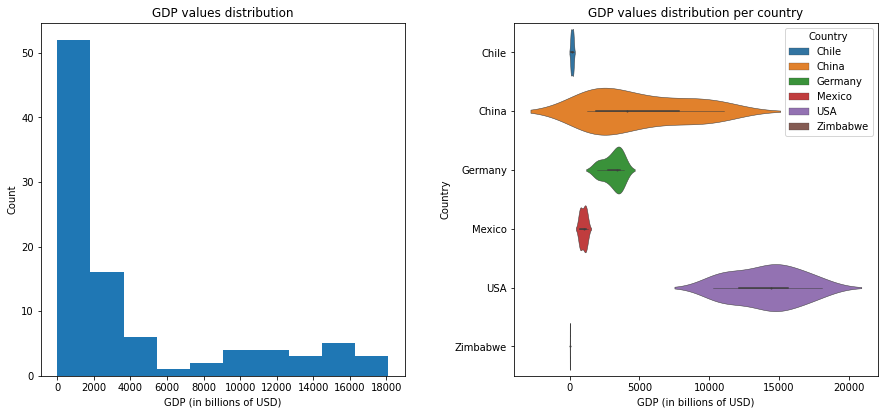

<Figure size 432x288 with 0 Axes>

In [5]:
fig, ax = plt.subplots(figsize=(15,7))
ax = plt.subplot(1,2,1)
plt.hist(data_file['GDP'], bins=10)
plt.title('GDP values distribution')
plt.xlabel(GDP)
plt.ylabel('Count')
ax.set_xticks([0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000])

ax = plt.subplot(1,2,2)
sns.violinplot(x='GDP', y='Country', data = data_file, hue='Country', width=0.8, dodge=False, linewidth=0.5)
plt.title('GDP values distribution per country')
plt.xlabel(GDP)
plt.subplots_adjust(hspace = 0.5, wspace = 0.3, bottom = 0.1, top = 0.8)
plt.show()
plt.clf()


### 2.2 Life Expectancy

Exploring the life expectancy value distribution and the general shape of the dataset: the values are left-skewed with majority of values falling above 70 years. The left skew of the data values is due to the relatively wide range of values represented by the data from Zimbabwe, while the other countries' ranges are comparatively narrow. This implies that the life expectancy in Zimbabwe is changing more dynamically than in other countries.

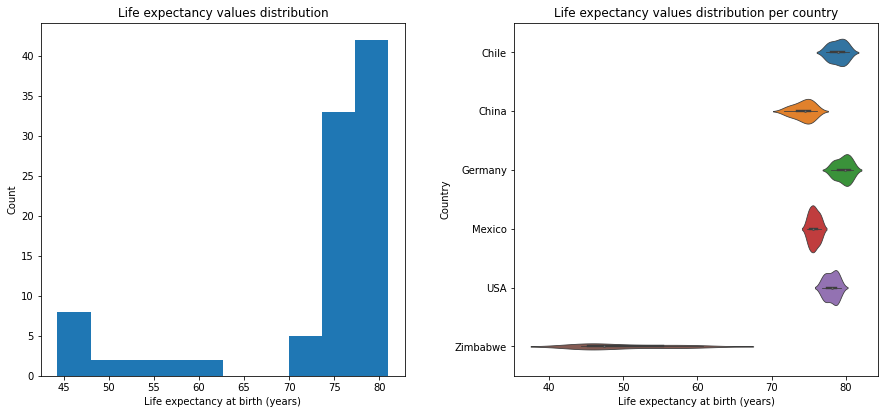

<Figure size 432x288 with 0 Axes>

In [6]:
fig, ax = plt.subplots(figsize=(15,7))
ax = plt.subplot(1,2,1)
plt.hist(data_file['Life'])
plt.title('Life expectancy values distribution')
plt.xlabel(life)
plt.ylabel('Count')

ax = plt.subplot(1,2,2)
sns.violinplot(x='Life', y='Country', data = data_file, width=0.8, dodge=False, linewidth=0.8)
plt.title('Life expectancy values distribution per country')
plt.xlabel(life)
plt.subplots_adjust(hspace = 0.5, wspace = 0.3, bottom = 0.1, top = 0.8)
plt.show()
plt.clf()

## 3. Averages

Calculating arithmetic mean values for life expectancy (years) and GDP (billions of USD) for every country in the table below.

In [7]:
dfMeans = data_file.drop("Year", axis = 1).groupby("Country").mean().reset_index()
print(dfMeans)

    Country      Life           GDP
0     Chile  78.94375    169.788844
1     China  74.26250   4957.713750
2   Germany  79.65625   3094.775625
3    Mexico  75.71875    976.650625
4       USA  78.06250  14075.000000
5  Zimbabwe  50.09375      9.062594


### 3.1 GDP

Looking at mean GDP values per country we can see a large variation of results: with USA's mean GDP being almost three times higher than China's mean GDP, which is second to USA's. Zimbabwe's mean GDP is so low (9.06 bln dollars), it is not visible on the chart.

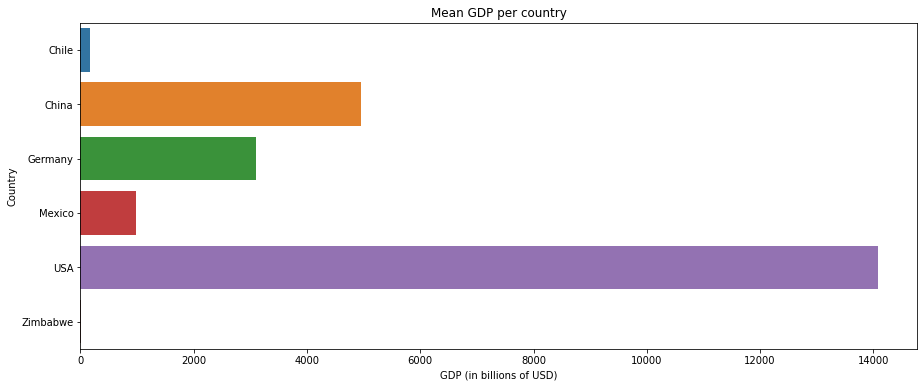

In [8]:
plt.figure(figsize=(15,6))
sns.barplot(x="GDP", y="Country", data=dfMeans)
plt.xlabel(GDP)
plt.title('Mean GDP per country')
plt.show()

### 3.2 Life Expectancy

As depicted in the "Life expectancy values distribution per country" chart from 2.2, the life expectancy values are not as varied as the GDP values, with the exception of Zimbabwe, whose life expectancy values are significantly lower than in the rest of the countries. This is also visible when examining countries' mean life expectancies on the chart below, where the mean life expectancy in Zimbabwe is significantly less than in other countries, whose mean life expectancy is on comparable levels.

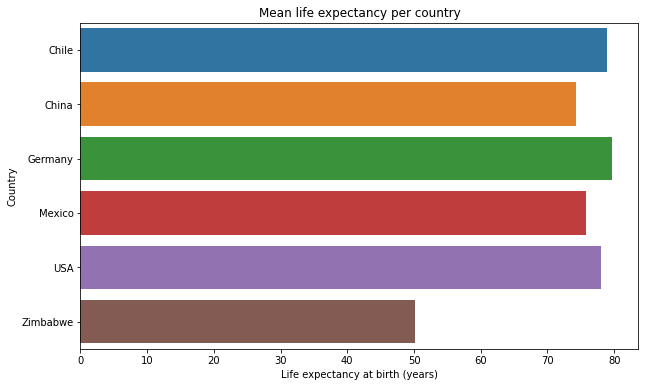

In [9]:
plt.figure(figsize=(10,6))
sns.barplot(x="Life", y="Country", data=dfMeans)
plt.xlabel(life)
plt.title('Mean life expectancy per country')
plt.show()

## 4. Trends over time

### 4.1 GDP

The GDP values appear to be positively correlated with time. The chart below presents the GDP over time trends for all countries. The GDP values differ considerably between the countries, making it difficult to see the trend for Zimbabwe and Chile, which have the lowest GDP values.

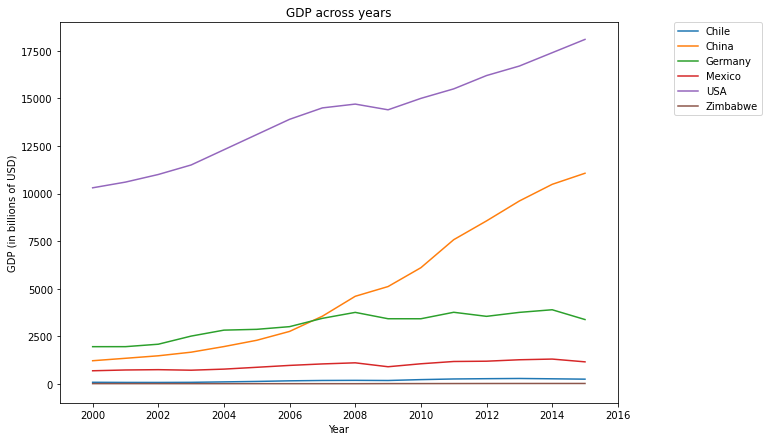

<Figure size 432x288 with 0 Axes>

In [10]:
plt.figure(figsize=[10,7])
for i in data_file.Country.unique():
    yvalues= data_file['GDP'][data_file['Country']==i]
    xvalues= data_file['Year'][data_file['Country']==i]
    plt.plot(xvalues, yvalues)
plt.legend(data_file.Country.unique(), bbox_to_anchor=(1.1, 1),loc='upper left', borderaxespad=0.) 
plt.axis([1999,2016,-1000,19000])
plt.title("GDP across years")
plt.xlabel('Year')
plt.ylabel(GDP)
plt.show()
plt.clf()

The below charts make the observation of individual trends easier. Despite a positive correlation between time and GDP, there are individual cases where GDP drops - especially in Chile and Mexico. Also, Germany's positive correlation between time and GDP has become less apparent after 2007.

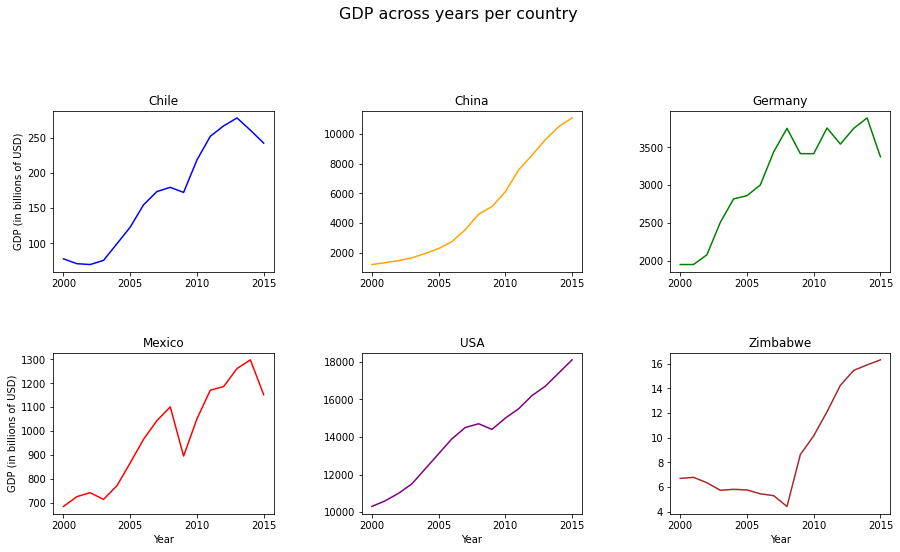

<Figure size 432x288 with 0 Axes>

In [11]:
fig, ax = plt.subplots(figsize=(15,8))
fig.suptitle('GDP across years per country', size=16)
counter = 0
for i in data_file.Country.unique():
    counter += 1
    ax = plt.subplot(2,3,counter)
    yvalues= data_file['GDP'][data_file['Country']==i]
    xvalues= data_file['Year'][data_file['Country']==i]
    plt.plot(xvalues, yvalues, color=colors[i])
    plt.title(i)
    if counter in (1, 4):
        plt.ylabel(GDP)
    if counter in (4, 5, 6):
        plt.xlabel('Year')
    
    ax.set_xticks([2000,2005,2010,2015])
plt.subplots_adjust(hspace = 0.5, wspace = 0.4, bottom = 0.1, top = 0.8)
plt.show()
plt.clf()

### 4.2 Life Expectancy

The life expectancy values appear to be positively correlated with time. The chart below presents the life expectancy over time trends for all countries. With the exception of Zimbabwe, there is little variation between countries' life expectancy over time, as their life expectancy grows steadily through time. Zimbabwe has a significantly lower life expectancy, but has experienced a clear positive trend since 2004 and thus has been reducing the difference between itself and the rest of the countries.

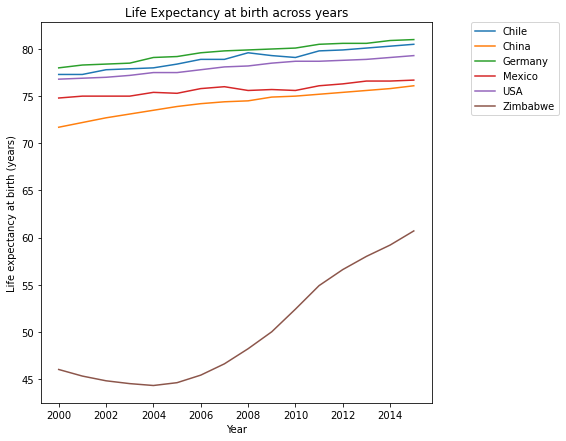

<Figure size 432x288 with 0 Axes>

In [12]:
plt.figure(figsize=[7,7])
for i in data_file.Country.unique():
    yvalues= data_file['Life'][data_file['Country']==i]
    xvalues= data_file['Year'][data_file['Country']==i]
    plt.plot(xvalues, yvalues)

plt.legend(data_file.Country.unique(), bbox_to_anchor=(1.1, 1),loc='upper left', borderaxespad=0.) 
plt.title('Life Expectancy at birth across years')
plt.xlabel('Year')
plt.ylabel(life)
plt.show()
plt.clf()

When exploring the trends over time per country, the observation of the positive time vs. life expectancy correlation is reinforced. Similarly to the GDP trends, Mexico and Chile experienced a temporary drop of the life expectancy around 2010. This implies a strong correlation between GDP and life expectancy, which will be discussed in more detail in the next chapter of this project.

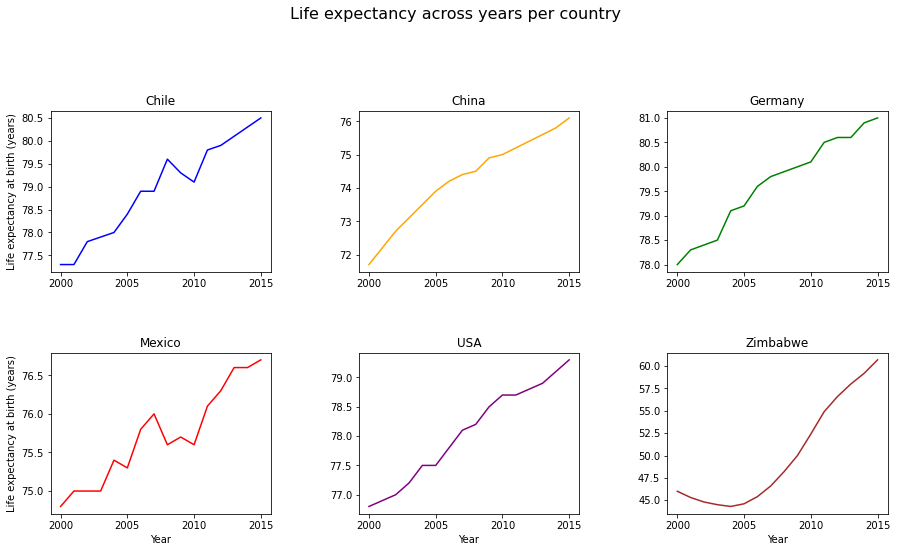

<Figure size 432x288 with 0 Axes>

In [13]:
fig, ax = plt.subplots(figsize=(15,8))
fig.suptitle('Life expectancy across years per country', size=16)
counter = 0
for i in data_file.Country.unique():
    counter += 1
    ax = plt.subplot(2,3,counter)
    yvalues= data_file['Life'][data_file['Country']==i]
    xvalues= data_file['Year'][data_file['Country']==i]
    plt.plot(xvalues, yvalues, color=colors[i])
    plt.title(i)
    ax.set_xticks([2000,2005,2010,2015])
    if counter in (1, 4):
        plt.ylabel(life)
    if counter in (4, 5, 6):
        plt.xlabel('Year')
plt.subplots_adjust(hspace = 0.5, wspace = 0.4, bottom = 0.1, top = 0.8)
plt.show()
plt.clf()

## 5. Linear relationship between GDP and Life Expectancy

### 5.1 First look

The plot below attempts to consolidate the data for all countries and present the relationship between Life Expectancy and GDP.
What becomes immediately evident is that there is a significant discrepancy between each country's GDP, which consequently fails any attempt to draw a linear correlation between GDP and Life Expectancy when analyzing the data from all countries at once.

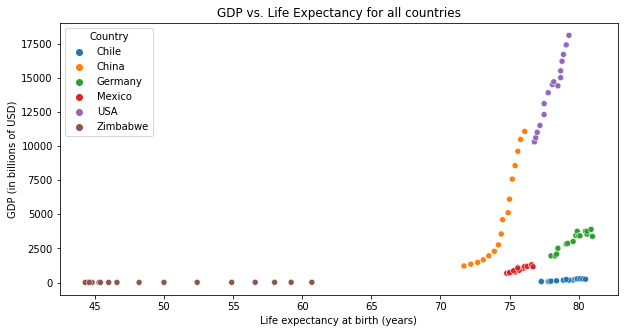

<Figure size 432x288 with 0 Axes>

In [14]:
plt.figure(figsize=(10,5))

sns.scatterplot(y = 'GDP', x = 'Life', data = data_file, hue = 'Country')
plt.xlabel(life)
plt.ylabel(GDP)
plt.title('GDP vs. Life Expectancy for all countries')
plt.show()
plt.clf()

The charts below help to assess the correlation for individual countries. Now it is much more evident that the relationship between country's GDP and Life Expectancy is positively correlated.

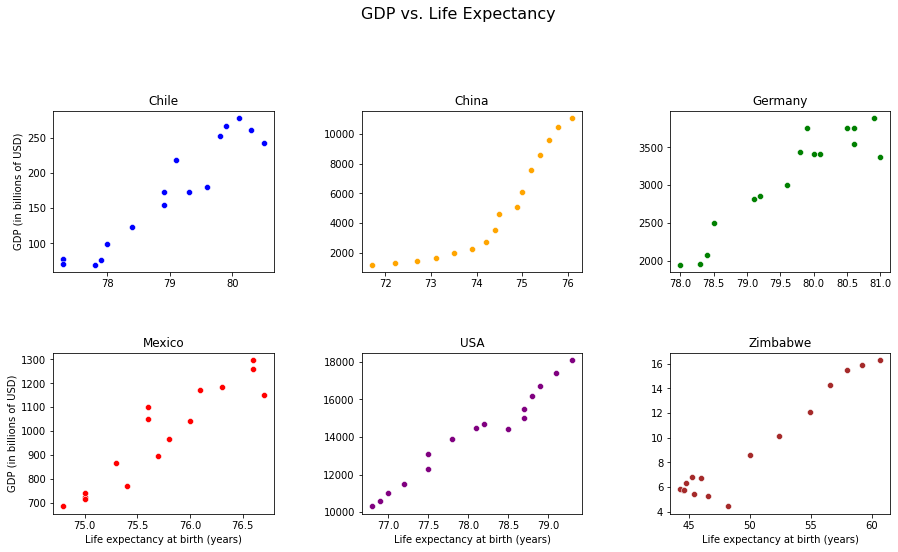

<Figure size 432x288 with 0 Axes>

In [15]:
fig, ax = plt.subplots(figsize=(15,8))
fig.suptitle('GDP vs. Life Expectancy', size=16)
counter = 0
for i in data_file.Country.unique():
    counter += 1
    ax = plt.subplot(2,3,counter)
    sns.scatterplot(y = 'GDP', x = 'Life', data = data_file[data_file['Country']==i], color=colors[i])
    plt.title(i)
    if counter in (1, 4):
        plt.ylabel(GDP)
    else:
        plt.ylabel('')
    if counter in (4, 5, 6):
        plt.xlabel(life)
    else:
        plt.xlabel('')

plt.subplots_adjust(hspace = 0.5, wspace = 0.4, bottom = 0.1, top = 0.8)
plt.show()
plt.clf()

### 5.2 Quantifying correlation using Pearson's coefficient

To double check the relationship between GDP and Life Expectancy in a given country is positively correlated, Pearson's coefficient can be used to quantify that correlation. The coefficient measures the correlation on a scale from -1 to 1, where -1 is a perfect negative correlation, 0 implies no correlation and 1 indicates a perfect positive correlation.

In [16]:
for i in data_file.Country.unique():
    yvalues= data_file['Life'][data_file['Country']==i]
    xvalues= data_file['GDP'][data_file['Country']==i]
    corr = np.corrcoef(xvalues, yvalues)
    corr = corr[1,0]
    if corr < 0:
        direction = 'negative'
    elif corr > 0:
        direction = 'positive'
    else:
        direction = 'undetermined'
    
    abs_corr = abs(corr)
    
    if abs_corr > 0.8:
        impact = 'a strong'
    elif abs_corr > 0.5:
        impact = 'a moderate'
    elif abs_corr > 0.3:
        impact = 'a weak'
    else:
        impact = 'a negligible'
    
    print(f'The GDP and life expectancy data for {i} shows {impact} {direction} correlation ({round(corr,2)}).')

The GDP and life expectancy data for Chile shows a strong positive correlation (0.95).
The GDP and life expectancy data for China shows a strong positive correlation (0.91).
The GDP and life expectancy data for Germany shows a strong positive correlation (0.93).
The GDP and life expectancy data for Mexico shows a strong positive correlation (0.93).
The GDP and life expectancy data for USA shows a strong positive correlation (0.98).
The GDP and life expectancy data for Zimbabwe shows a strong positive correlation (0.97).


## 6. Conclusions

To answer the questions posed at the beginning of the project:<br>
<br>    
Has life expectancy increased over time in the six nations?<br>
Yes, all countries have experienced an increase in their respective life expectancy over time, most notably, Zimbabwe.<br><br>

Has GDP increased over time in the six nations?<br>
Yes, all countries have experienced an increase in their respective GDP over time, most notably, China.<br><br>

Is there a correlation between GDP and life expectancy of a country?<br>
Yes, there is a strong positive correlation between GDP and life expectancy of a country.<br><br>

What is the average life expectancy in these nations?<br>
Average life expectancy was between mid to high 70s for the countries except for Zimbabwe which was 50.<br><br>

What is the distribution of that life expectancy?<br>
The life expectancy had a left skew, or most of the observations were on the right side.